In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%pylab inline


import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
y = train['SalePrice']
Ids = test['Id']
train = train.drop(columns=['Id', 'SalePrice'])
test = test.drop(columns=['Id'])

**Как видно, мы имеет достаточно большое количество категориальных переменных, обрабораем их с помощью get_dummies. Но для начала добавить новый столбец is_test, чтобы отличать тестовую выборку от тренировочной.**

In [5]:
train['is_test'] = 0
test['is_test'] = 1

In [6]:
data = pd.concat([train, test])

In [7]:
int_columns = np.array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'is_test'])
obj_columns = np.array([ x for x in data.columns if x not in int_columns ])

In [8]:
data = pd.get_dummies(data, columns=obj_columns)

In [9]:
data.shape

(2919, 1128)

In [10]:
data.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,is_test,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_21.0,LotFrontage_22.0,LotFrontage_24.0,LotFrontage_25.0,LotFrontage_26.0,LotFrontage_28.0,LotFrontage_30.0,LotFrontage_31.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,...,MiscVal_900,MiscVal_1000,MiscVal_1150,MiscVal_1200,MiscVal_1300,MiscVal_1400,MiscVal_1500,MiscVal_1512,MiscVal_2000,MiscVal_2500,MiscVal_3000,MiscVal_3500,MiscVal_4500,MiscVal_6500,MiscVal_8300,MiscVal_12500,MiscVal_15500,MiscVal_17000,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706.0,150.0,856.0,856,854,1710,548.0,0,61,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,9600,0.0,978.0,284.0,1262.0,1262,0,1262,460.0,298,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,11250,162.0,486.0,434.0,920.0,920,866,1786,608.0,0,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,9550,0.0,216.0,540.0,756.0,961,756,1717,642.0,0,35,272,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,14260,350.0,655.0,490.0,1145.0,1145,1053,2198,836.0,192,84,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [11]:
X_TRAIN = data[data.is_test==0].drop('is_test', axis=1)
X_TEST = data[data.is_test==1].drop('is_test', axis=1)
columns = X_TRAIN.columns

**Разделим нашу тренировочную выборку с помощью метода train_test_split.**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y, test_size=0.2)

**Заполним пропущенные значения.**

In [13]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True)

imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

**Проведем нормализацию наших данных.**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_imputed)

X_train_scaled = scaler.transform(X_train_imputed)
X_train = pd.DataFrame(X_train_scaled, columns=columns)

**Нормализуем тестовые данные.**

In [15]:
X_test = scaler.transform(imputer.transform(X_test))
X_test = pd.DataFrame(X_test, columns=columns)

In [16]:
X_TEST = scaler.transform(imputer.transform(X_TEST))
X_TEST = pd.DataFrame(X_TEST, columns=columns)

In [17]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


C:\Users\Arsenii\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



**Для выбранных нами моделей: линейная регрессия, случайный лес, метод опорных векторов (полином второй степени), градиентный бустинг (из двух разных библиотек) подберем подходящие параметры с помощью GridSearchCV.**

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':range(1, 7, 1),
    'learning_rate':np.arange(0.1, 0.4, 0.1),
}

gsearch0 = GridSearchCV(
            estimator=GradientBoostingRegressor(),
            param_grid = parameters,
            scoring='neg_mean_squared_log_error',
            n_jobs=-1,
            iid=False,
            cv=10
)
gsearch0.fit(X_train, y_train)
gsearch0.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [19]:
parameters = {
    'max_depth':range(1, 7, 1),
    'learning_rate':np.arange(0.1, 0.4, 0.1),
}

gsearch1 = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid = parameters,
            scoring='neg_mean_squared_log_error',
            n_jobs=-1,
            iid=False,
            cv=10
)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [20]:
parameters = {
    'alpha':range(500, 2000, 50),
}

gsearch2 = GridSearchCV(
            estimator=Lasso(),
            param_grid = parameters,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            iid=False,
            cv=10
)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_

{'alpha': 1900}

In [21]:
parameters = {
    'kernel':['poly'],
    'C':[20000, 45000, 60000, 50000],
    'degree':[2],
    'coef0':[0.85, 0.75, 0.65]
}

gsearch3 = GridSearchCV(
            estimator=SVR(), 
            param_grid = parameters, 
            scoring='neg_mean_squared_log_error', 
            n_jobs=-1,
            iid=False,
            cv=10
)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_

{'C': 45000, 'coef0': 0.65, 'degree': 2, 'kernel': 'poly'}

**Обучим модели на этих параметрах.**

In [22]:
svrreg = SVR(
        kernel=gsearch3.best_params_['kernel'],
        C=gsearch3.best_params_['C'],
        degree=gsearch3.best_params_['degree'],
        coef0=gsearch3.best_params_['coef0']
)
y_test_predict_svrreg = svrreg.fit(X_train, y_train).predict(X_test)

In [23]:
gbreg = GradientBoostingRegressor(
        max_depth=gsearch1.best_params_['max_depth'],
        learning_rate=gsearch1.best_params_['learning_rate'],
        n_estimators=1000
)
gbreg.fit(X_train, y_train)
y_test_predict_gbreg = gbreg.predict(X_test)

In [24]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=5)

xgbreg = XGBRegressor(
        max_depth=gsearch1.best_params_['max_depth'],
        learning_rate=gsearch1.best_params_['learning_rate'],
        n_estimators=1000
)

lasreg = Lasso(
        alpha=gsearch2.best_params_['alpha']
)

rfreg = RandomForestRegressor()

xgbreg.fit(X_train, y_train)
lasreg.fit(X_train, y_train)
rfreg.fit(X_train, y_train)


y_test_predict_lasreg = lasreg.predict(X_test)
y_test_predict_xgbreg = xgbreg.predict(X_test)
y_test_predict_rfreg = rfreg.predict(X_test)

**Изобразим на графиках результаты предсказания и сравним их с тестовыми данными.**

Text(0.5, 1.0, 'GBRegressor')

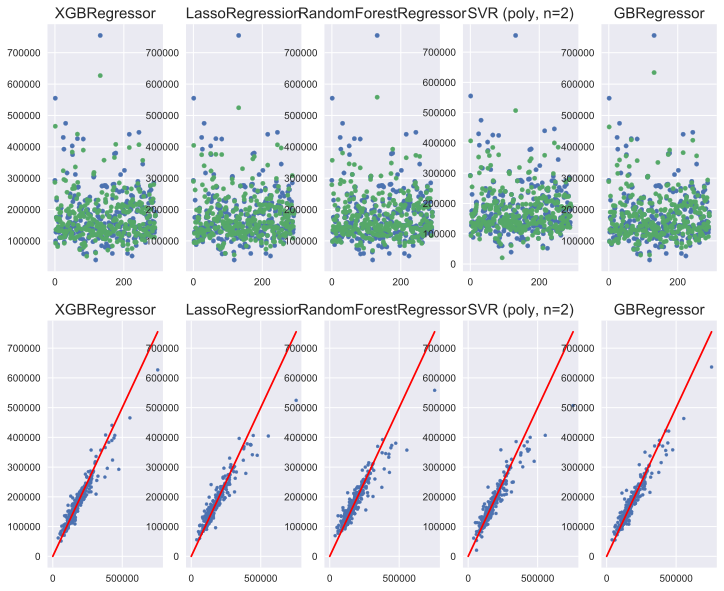

In [25]:
fig, axes = plt.subplots(2, 5, figsize=(12, 10))

axes[0][0].scatter(np.linspace(0, len(y_test), len(y_test)), y_test, s=20)
axes[0][0].scatter(np.linspace(0, len(y_test), len(y_test)), y_test_predict_xgbreg, s=20)
axes[0][0].set_title('XGBRegressor', fontsize=15)

axes[1][0].scatter(y_test, y_test_predict_xgbreg, s=10)
axes[1][0].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
axes[1][0].set_title('XGBRegressor', fontsize=15)

axes[0][1].scatter(np.linspace(0, len(y_test), len(y_test)), y_test, s=20)
axes[0][1].scatter(np.linspace(0, len(y_test), len(y_test)), y_test_predict_lasreg, s=20)
axes[0][1].set_title('LassoRegression', fontsize=15)

axes[1][1].scatter(y_test, y_test_predict_lasreg, s=10)
axes[1][1].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
axes[1][1].set_title('LassoRegression', fontsize=15)

axes[0][2].scatter(np.linspace(0, len(y_test), len(y_test)), y_test, s=20)
axes[0][2].scatter(np.linspace(0, len(y_test), len(y_test)), y_test_predict_rfreg, s=20)
axes[0][2].set_title('RandomForestRegressor', fontsize=15)

axes[1][2].scatter(y_test, y_test_predict_rfreg, s=10)
axes[1][2].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
axes[1][2].set_title('RandomForestRegressor', fontsize=15)

axes[0][3].scatter(np.linspace(0, len(y_test), len(y_test)), y_test, s=20)
axes[0][3].scatter(np.linspace(0, len(y_test), len(y_test)), y_test_predict_svrreg, s=20)
axes[0][3].set_title('SVR (poly, n=2)', fontsize=15)

axes[1][3].scatter(y_test, y_test_predict_svrreg, s=10)
axes[1][3].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
axes[1][3].set_title('SVR (poly, n=2)', fontsize=15)

axes[0][4].scatter(np.linspace(0, len(y_test), len(y_test)), y_test, s=20)
axes[0][4].scatter(np.linspace(0, len(y_test), len(y_test)), y_test_predict_gbreg, s=20)
axes[0][4].set_title('GBRegressor', fontsize=15)

axes[1][4].scatter(y_test, y_test_predict_gbreg, s=10)
axes[1][4].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
axes[1][4].set_title('GBRegressor', fontsize=15)

**Выведем топ-20 фичей для Lasso-регрессии.**

<BarContainer object of 20 artists>

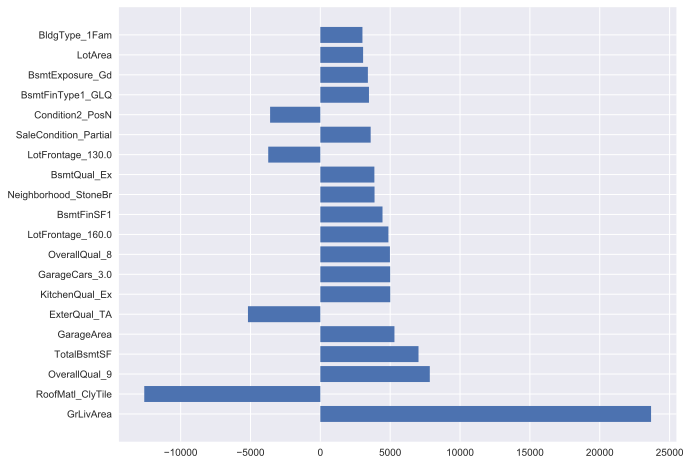

In [26]:
fe_imp = {}
coefs = lasreg.coef_
for i in range(0, len(columns)):
    name = columns[i]
    fe_imp[name] = coefs[i]
    
fe_imp_sorted = sorted(fe_imp.items(), key=lambda x: abs(x[1]))[::-1]

values = [i[1] for i in fe_imp_sorted]
names = [i[0] for i in fe_imp_sorted]

plt.figure(figsize=(10,8))
plt.barh(names[:20], values[:20])

**Выведем важность признаков также для случайноголеса.**

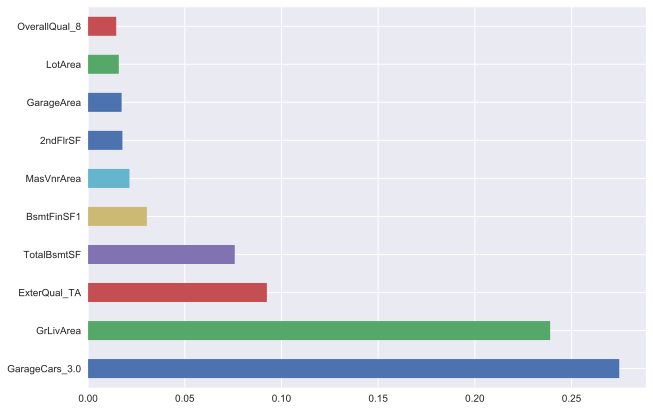

In [27]:
IDcol = 'Id'
y_label = 'SalePrice'
predictors = [x for x in columns if x not in [y_label, IDcol]]
plt.figure(figsize=(10,7))
(pd.Series(rfreg.feature_importances_, predictors).sort_values(ascending=False))[:10].plot(kind='barh')

**Для стекинга будем использовать класс DjStacking. Стекать будем все обученные модели.**

In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_predict


class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.2, cv=3, err=0.001, random_state=None):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self
    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [29]:
regs = [gbreg, xgbreg, lasreg, rfreg, svrreg]

In [30]:
ens_model = Ridge()
s1 = DjStacking(regs, ens_model)
s1.fit(X_train, y_train)

s2 = DjStacking(regs, ens_model)
s2.fit(X_train, y_train, p=-1)

DjStacking(ens_model=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
      models=[GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples... epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)])

In [31]:
y_test_predict_s1 = s1.predict(X_test)
y_test_predict_s2 = s2.predict(X_test)

**Будем считать 6 различных метрик: RSMLE, MPE, RMSE, Explained variance, R2. Также будем использовать кросс-валидацию (n=10). Для этих целей напишем две функции.**

In [32]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

def cross_val(clf, X_train, y_train, X_test, y_test, stack_cv):
    stacked_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        stacked_test += clf.predict(X_test)
    stacked_test = stacked_test / stack_cv.n_splits
    return stacked_test

def metrics(y_test, y_cross, metric_type):
    
    if metric_type == 'RSMLE':
        return (mean_squared_log_error(y_test, y_cross))**0.5
    
    elif metric_type == 'MPE':
        return 100*((abs(y_test - y_cross))/y_test).sum()/len(y_test)
    
    elif metric_type == 'Root absolute error':
        return (mean_absolute_error(y_test, y_cross))**0.5
    
    elif metric_type == 'RMSE':
        return (mean_squared_error(y_test, y_cross))**0.5
    
    elif metric_type == 'Explained variance score':
        return explained_variance_score(y_test, y_cross)
    
    elif metric_type == 'R2 score':
        return r2_score(y_test, y_cross)

In [33]:
predicts = [y_test_predict_gbreg, y_test_predict_xgbreg, y_test_predict_lasreg, y_test_predict_rfreg, y_test_predict_svrreg, y_test_predict_s1, y_test_predict_s2]
regs = [gbreg, xgbreg, lasreg, rfreg, svrreg, s1, s2]

In [34]:
index = ['GBRegressor', 'XGBRegressor', 'LassoRegression', 'RandomForestRegressor', 'SMR(Poly, n=2)', 'Stacked-1', 'Stacked-2']
metrics_columns = ['RSMLE', 'Root absolute error', 'RMSE', 'Explained variance score', 'R2 score', 'MPE']
metrics_scores = np.zeros(42).reshape(7,6)

**Посчитаем все метрики и оформим результаты в DataFrame.**

In [35]:
%%time
for i in range(0, len(regs)):
    print('Регрессор: {}. Проводится кросс-валидация. (n=10)'.format(index[i]))
    y_cross = cross_val(regs[i], X_train, y_train, X_test, y_test, stack_cv)
    print('Регрессор: {}, считаем метрики...'.format(index[i]))
    for k in range(0, len(metrics_columns)):
        metrics_scores[i][k] = metrics(y_test, y_cross, metric_type=metrics_columns[k])
    print('Выполнено.')

Регрессор: GBRegressor. Проводится кросс-валидация. (n=10)
Регрессор: GBRegressor, считаем метрики...
Выполнено.
Регрессор: XGBRegressor. Проводится кросс-валидация. (n=10)
Регрессор: XGBRegressor, считаем метрики...
Выполнено.
Регрессор: LassoRegression. Проводится кросс-валидация. (n=10)
Регрессор: LassoRegression, считаем метрики...
Выполнено.
Регрессор: RandomForestRegressor. Проводится кросс-валидация. (n=10)
Регрессор: RandomForestRegressor, считаем метрики...
Выполнено.
Регрессор: SMR(Poly, n=2). Проводится кросс-валидация. (n=10)
Регрессор: SMR(Poly, n=2), считаем метрики...
Выполнено.
Регрессор: Stacked-1. Проводится кросс-валидация. (n=10)
Регрессор: Stacked-1, считаем метрики...
Выполнено.
Регрессор: Stacked-2. Проводится кросс-валидация. (n=10)
Регрессор: Stacked-2, считаем метрики...
Выполнено.
Wall time: 30min 44s


In [36]:
metrics_df = pd.DataFrame(metrics_scores, index=index, columns=metrics_columns)
metrics_df

,RSMLE,Root absolute error,RMSE,Explained variance score,R2 score,MPE
GBRegressor,0.136366,129.099194,27355.363928,0.895871,0.894976,9.800293
XGBRegressor,0.133505,128.610657,27242.900760,0.897099,0.895838,9.632776
LassoRegression,0.145967,134.019760,30533.560926,0.869828,0.869154,10.392914
RandomForestRegressor,0.168360,140.625224,32430.970254,0.852751,0.852387,12.110399
"SMR(Poly, n=2)",0.155068,136.218807,32150.826585,0.856805,0.854926,10.652416
Stacked-1,0.135231,128.661928,28394.427172,0.887980,0.886846,9.554360
Stacked-2,0.134358,127.898090,27713.386071,0.892750,0.892209,9.490060


**Визуализируем наши метрики.**

Text(0.5, 1.0, 'MPE')

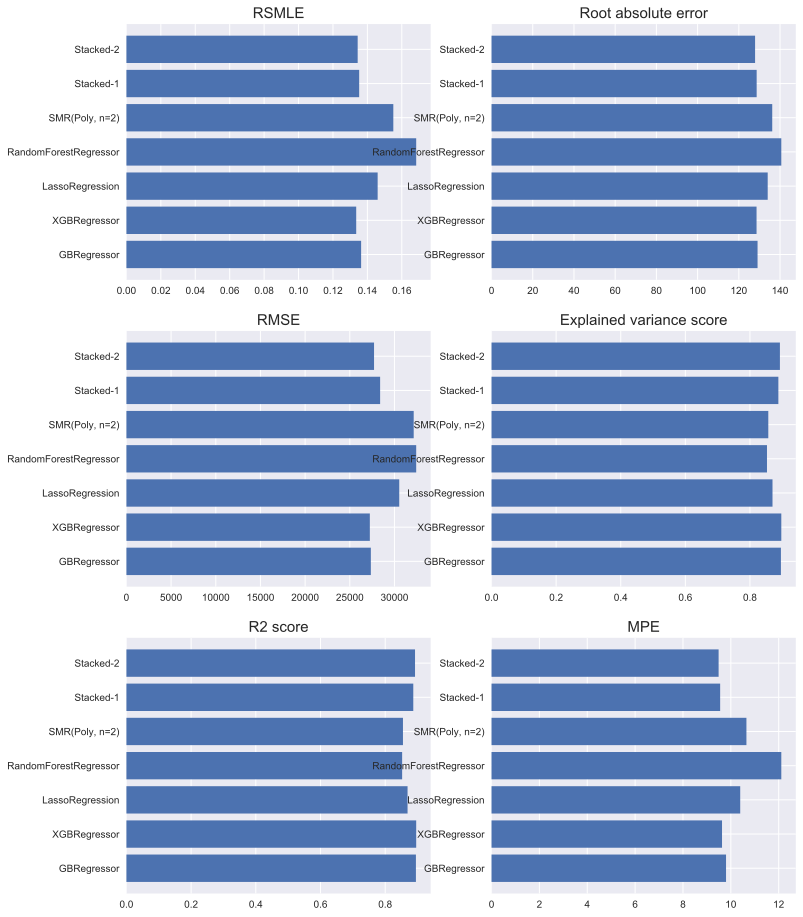

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

axes[0][0].barh(metrics_df['RSMLE'].index, list(metrics_df['RSMLE']))
axes[0][0].set_title('RSMLE', fontsize=15)

axes[0][1].barh(metrics_df['Root absolute error'].index, list(metrics_df['Root absolute error']))
axes[0][1].set_title('Root absolute error', fontsize=15)

axes[1][0].barh(metrics_df['RMSE'].index, list(metrics_df['RMSE']))
axes[1][0].set_title('RMSE', fontsize=15)

axes[1][1].barh(metrics_df['Explained variance score'].index, list(metrics_df['Explained variance score']))
axes[1][1].set_title('Explained variance score', fontsize=15)

axes[2][0].barh(metrics_df['R2 score'].index, list(metrics_df['R2 score']))
axes[2][0].set_title('R2 score', fontsize=15)

axes[2][1].barh(metrics_df['MPE'].index, list(metrics_df['MPE']))
axes[2][1].set_title('MPE', fontsize=15)

**Таким образом, видно, что получилось улучшить показатели на некоторых метриках за счет стекинга.**

**Сделаем предсказание на тестовых данных, которые даны для сабмита на Kaggle.**

In [38]:
y_TEST_predict1 = s1.predict(X_TEST)
y_TEST_predict2 = s2.predict(X_TEST)

In [39]:
submussion = 'Id,SalePrice\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(Ids, y_TEST_predict1)])

with open('submission1.txt', 'w') as file:
    file.write(submussion)

In [45]:
submussion = 'Id,SalePrice\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(Ids, y_TEST_predict2)])

with open('submission2.txt', 'w') as file:
    file.write(submussion)

## Вывод: 
### На тестовых данных для сабмита нам удалось получить RSMLE равный 0.14503 (модель s1). На тех же данных наша лучшая модель XGBRegressor дает результат 0.14822. То есть качество стекнутой модели повысилось.